In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
data = load_iris()
X = data.data
y = data.target

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [4]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


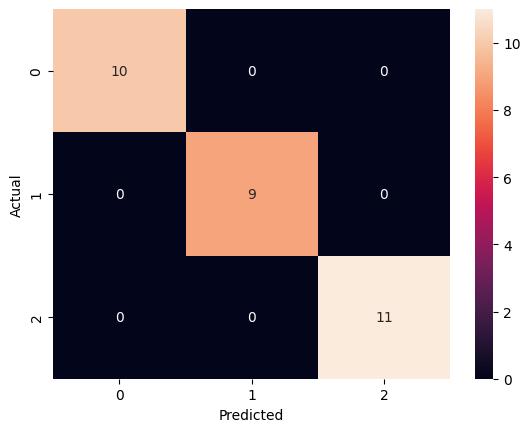

In [6]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

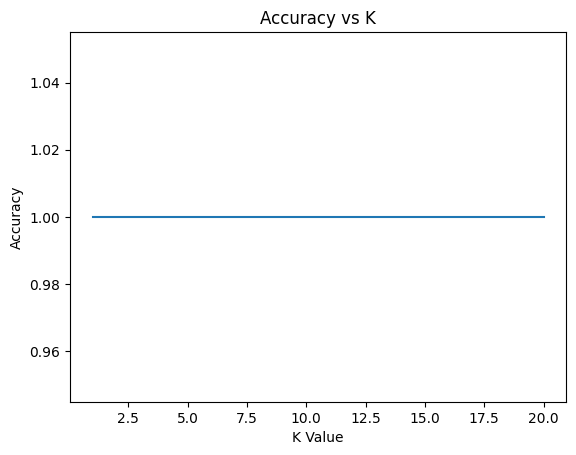

In [7]:
k_values = range(1, 21)
accuracies = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    accuracies.append(accuracy_score(y_test, pred))

plt.plot(k_values, accuracies)
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.title("Accuracy vs K")
plt.show()

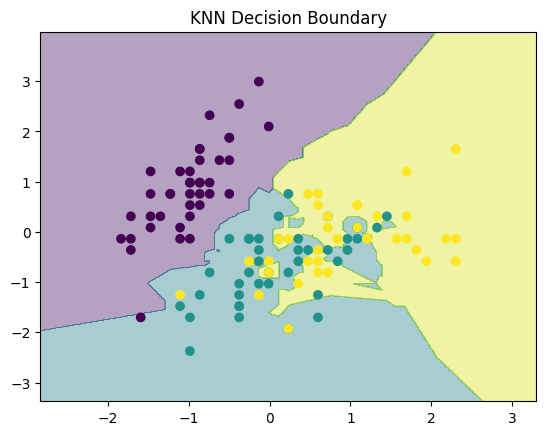

In [8]:
X_small = X[:, :2]  # first 2 features

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(
    X_small, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train_s)
X_test_s = scaler.transform(X_test_s)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_s, y_train_s)

# Create meshgrid
x_min, x_max = X_train_s[:, 0].min() - 1, X_train_s[:, 0].max() + 1
y_min, y_max = X_train_s[:, 1].min() - 1, X_train_s[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_train_s[:, 0], X_train_s[:, 1], c=y_train_s)
plt.title("KNN Decision Boundary")
plt.show()

**CONCLUSION**

KNN performs well on the Iris dataset when features are normalized. The choice of K significantly impacts model performance, and an optimal K balances bias and variance.